# Problem statement:-
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.

# Steps:-
1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

#### Importing the neccesary Libraries

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np

# Importing Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Display Formatting
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Reading and understanding the data

In [3]:
# Reading the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
#Checking the shape of the dataset
df.shape

(99999, 226)

In [5]:
#Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [7]:
# creating backup for dataset
original= df.copy()

In [8]:
# creating columns name by its types
id_col=['mobile_number','circle_id']

date_col= ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_col= ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_col=[i for i in df.columns if i not in date_col+ cat_col + id_col]
print('#id_col: %d\n#date col: %d\n#cat col: %d\n#num col:%d'% (len(id_col), len(date_col), len(cat_col), len(num_col)) )
print(len(id_col)+ len(date_col)+ len(cat_col)+ len(num_col)== df.shape[1])

#id_col: 2
#date col: 12
#cat col: 8
#num col:204
True


In [9]:
# Renaming the columns
df.rename(columns = {'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'}, inplace=True)

## Handling missing value

In [10]:
round(df.isnull().mean()*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

### Imputing the missing values

In [11]:
# some recharge columns have 1 value and some dont have
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]
df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [12]:
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ['total_rech_data_6','date_of_last_rech_data_6']]

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
...,...,...
99991,NaN,NaN
99992,NaN,NaN
99993,NaN,NaN
99994,NaN,NaN


In [13]:
# Listing the columns to be imputed with zero
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [14]:
# Imputing with zero
df[zero_impute]= df[zero_impute].apply(lambda x: x.fillna(0))

# Checking the missing values
round(df[zero_impute].isnull().mean()*100,2)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64

In [15]:
# Checking the Statistical details
print(df[zero_impute].describe(include='all'))

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count       99999.000000        99999.000000        99999.000000   
mean            0.632806           48.445409           51.393440   
std             1.669040          127.743863          132.629365   
min             0.000000            0.000000            0.000000   
25%             0.000000            0.000000            0.000000 

In [16]:
# Dropping the ID columns and date columns
df = df.drop(id_col + date_col, axis=1)
df.shape

(99999, 212)

###  Dealing with Nan values in categorical variables

In [17]:
# Replacing the Nan values with -1
df[cat_col]=df[cat_col].apply(lambda x: x.fillna(-1))

In [18]:
# checking for missing values in categorical variable 
print(round(df[cat_col].isnull().mean()*100,2))

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


### Creating new feature

In [19]:
df['total_data_rech_amt_6']= df['total_rech_data_6']*df['av_rech_amt_data_6']
df['total_data_rech_amt_7']= df['total_rech_data_7']*df['av_rech_amt_data_7']
df['total_data_rech_amt_8']= df['total_rech_data_8']*df['av_rech_amt_data_8']
df['total_data_rech_amt_9']= df['total_rech_data_9']*df['av_rech_amt_data_9']

### Filtering High Value Customers

In [20]:
# Finding the 70th percentile of the avg_rech_amt_6_7

avg_month_rech_6_7 = df[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
X = np.percentile(avg_month_rech_6_7, 70)

print('70th percentage ', X)

70th percentage  239.0


In [21]:
# Filter the customers, who have recharged more than or equal to X.
df2 = df[avg_month_rech_6_7 >= X]
df2.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,-1.0,0,0,0,0,0

In [22]:
# Resetting the index
df2=df2.reset_index(drop=True)
df2.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,-1.0,0,0,0,0,0

In [23]:
df2.shape

(30001, 216)

## Creating Target Varible as Churn

In [24]:
# Tagging churn to dataset
churn_var_data= df2[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_var_data.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,34.91,142.18,0.00,0.00
3,252.61,1031.53,0.00,0.00
4,127.48,127.63,13.93,314.74


In [25]:
# creating the Churn column
df2['churn']= df2.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) and 
                                       (x.total_og_mou_9 == 0) and 
                                       (x.vol_2g_mb_9 == 0) and 
                                       (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [26]:
# Checking the head of the Churn column
df2['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

### Removing all the attributes corresponding to the churn phase
(all attributes having ‘ _9’, etc. in their names).

In [27]:
# Listing all the columns having 9 in their name
cols_hav_9= [col for col in df2.columns if '_9' in col]
cols_hav_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9',
 'total_data_rech_amt_9']

In [28]:
# dropping the cols_hav_9
df2.drop(cols_hav_9, axis=1, inplace=True)
df2.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,3

In [29]:
# Checking the null values again
round(df2.isnull().mean()*100,2)

loc_og_t2o_mou            0.75
std_og_t2o_mou            0.75
loc_ic_t2o_mou            0.75
arpu_6                    0.00
arpu_7                    0.00
arpu_8                    0.00
onnet_mou_6               1.82
onnet_mou_7               1.79
onnet_mou_8               3.91
offnet_mou_6              1.82
offnet_mou_7              1.79
offnet_mou_8              3.91
roam_ic_mou_6             1.82
roam_ic_mou_7             1.79
roam_ic_mou_8             3.91
roam_og_mou_6             1.82
roam_og_mou_7             1.79
roam_og_mou_8             3.91
loc_og_t2t_mou_6          1.82
loc_og_t2t_mou_7          1.79
loc_og_t2t_mou_8          3.91
loc_og_t2m_mou_6          1.82
loc_og_t2m_mou_7          1.79
loc_og_t2m_mou_8          3.91
loc_og_t2f_mou_6          1.82
loc_og_t2f_mou_7          1.79
loc_og_t2f_mou_8          3.91
loc_og_t2c_mou_6          1.82
loc_og_t2c_mou_7          1.79
loc_og_t2c_mou_8          3.91
loc_og_mou_6              1.82
loc_og_mou_7              1.79
loc_og_m

In [30]:
cols= ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
        'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 
        'count_rech_3g_7', 'count_rech_3g_8']
df2[cols]= df2[cols].fillna(0)

In [31]:
# Checking the null values again
round(df2[cols].isnull().mean()*100,2)

arpu_3g_6          0.0
arpu_3g_7          0.0
arpu_3g_8          0.0
arpu_2g_6          0.0
arpu_2g_7          0.0
arpu_2g_8          0.0
count_rech_2g_6    0.0
count_rech_2g_7    0.0
count_rech_2g_8    0.0
count_rech_3g_6    0.0
count_rech_3g_7    0.0
count_rech_3g_8    0.0
dtype: float64

In [32]:
df2[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   arpu_3g_6        30001 non-null  float64
 1   arpu_3g_7        30001 non-null  float64
 2   arpu_3g_8        30001 non-null  float64
 3   arpu_2g_6        30001 non-null  float64
 4   arpu_2g_7        30001 non-null  float64
 5   arpu_2g_8        30001 non-null  float64
 6   count_rech_2g_6  30001 non-null  float64
 7   count_rech_2g_7  30001 non-null  float64
 8   count_rech_2g_8  30001 non-null  float64
 9   count_rech_3g_6  30001 non-null  float64
 10  count_rech_3g_7  30001 non-null  float64
 11  count_rech_3g_8  30001 non-null  float64
dtypes: float64(12)
memory usage: 2.7 MB


### columns with zero varience 

In [33]:
col_with_zero_var = df2.var()==0
print('total columns of zero var - ', col_with_zero_var.sum())

col_with_zero_var = col_with_zero_var[col_with_zero_var == 1].index
print(col_with_zero_var)

print('----------------------------------------')

col_with_1_unique_value= df2.nunique()==1
print('total number of unquie value - ', col_with_1_unique_value.sum())

col_with_1_unique_value= col_with_1_unique_value[col_with_1_unique_value==1].index
print(col_with_1_unique_value)

total columns of zero var -  9
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')
----------------------------------------
total number of unquie value -  9
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [34]:
df2.drop(col_with_zero_var, axis=1, inplace=True)
df2.shape

(30001, 155)

In [35]:
col_with_null_value= df2.columns[df2.isna().any()].tolist()
print(col_with_null_value)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic

In [36]:
# null value of 6th month
col_null_value_6_month= [col for col in col_with_null_value if '_6' in col]
col_null_value_6_month

['onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6']

In [37]:
round(df2[col_null_value_6_month].isnull().mean()*100,2)

onnet_mou_6         1.82
offnet_mou_6        1.82
roam_ic_mou_6       1.82
roam_og_mou_6       1.82
loc_og_t2t_mou_6    1.82
loc_og_t2m_mou_6    1.82
loc_og_t2f_mou_6    1.82
loc_og_t2c_mou_6    1.82
loc_og_mou_6        1.82
std_og_t2t_mou_6    1.82
std_og_t2m_mou_6    1.82
std_og_t2f_mou_6    1.82
std_og_mou_6        1.82
isd_og_mou_6        1.82
spl_og_mou_6        1.82
og_others_6         1.82
loc_ic_t2t_mou_6    1.82
loc_ic_t2m_mou_6    1.82
loc_ic_t2f_mou_6    1.82
loc_ic_mou_6        1.82
std_ic_t2t_mou_6    1.82
std_ic_t2m_mou_6    1.82
std_ic_t2f_mou_6    1.82
std_ic_mou_6        1.82
spl_ic_mou_6        1.82
isd_ic_mou_6        1.82
ic_others_6         1.82
dtype: float64

In [38]:
col_null_value_7_month= [col for col in col_with_null_value if '_7' in col]
col_null_value_7_month

['onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7']

In [39]:
round(df2[col_null_value_7_month].isnull().mean()*100,2)

onnet_mou_7         1.79
offnet_mou_7        1.79
roam_ic_mou_7       1.79
roam_og_mou_7       1.79
loc_og_t2t_mou_7    1.79
loc_og_t2m_mou_7    1.79
loc_og_t2f_mou_7    1.79
loc_og_t2c_mou_7    1.79
loc_og_mou_7        1.79
std_og_t2t_mou_7    1.79
std_og_t2m_mou_7    1.79
std_og_t2f_mou_7    1.79
std_og_mou_7        1.79
isd_og_mou_7        1.79
spl_og_mou_7        1.79
og_others_7         1.79
loc_ic_t2t_mou_7    1.79
loc_ic_t2m_mou_7    1.79
loc_ic_t2f_mou_7    1.79
loc_ic_mou_7        1.79
std_ic_t2t_mou_7    1.79
std_ic_t2m_mou_7    1.79
std_ic_t2f_mou_7    1.79
std_ic_mou_7        1.79
spl_ic_mou_7        1.79
isd_ic_mou_7        1.79
ic_others_7         1.79
dtype: float64

In [40]:
col_null_value_8_month = [col for col in col_with_null_value if '_8' in col]
col_null_value_8_month

['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8']

In [41]:
round(df2[col_null_value_8_month].isnull().mean()*100,2)

onnet_mou_8         3.91
offnet_mou_8        3.91
roam_ic_mou_8       3.91
roam_og_mou_8       3.91
loc_og_t2t_mou_8    3.91
loc_og_t2m_mou_8    3.91
loc_og_t2f_mou_8    3.91
loc_og_t2c_mou_8    3.91
loc_og_mou_8        3.91
std_og_t2t_mou_8    3.91
std_og_t2m_mou_8    3.91
std_og_t2f_mou_8    3.91
std_og_mou_8        3.91
isd_og_mou_8        3.91
spl_og_mou_8        3.91
og_others_8         3.91
loc_ic_t2t_mou_8    3.91
loc_ic_t2m_mou_8    3.91
loc_ic_t2f_mou_8    3.91
loc_ic_mou_8        3.91
std_ic_t2t_mou_8    3.91
std_ic_t2m_mou_8    3.91
std_ic_t2f_mou_8    3.91
std_ic_mou_8        3.91
spl_ic_mou_8        3.91
isd_ic_mou_8        3.91
ic_others_8         3.91
dtype: float64

In [42]:
for i in col_with_null_value:
    df2[i].fillna(0 , inplace=True)

###### we see that at 8th month null % was high means churn chance was high

In [43]:
print(df2.isnull().sum())

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
std_og_t2f_mou_6         0
s

## lets drop ic,og, 2g, 3g columns bcz that columns was use to tag churn 

In [44]:
individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
df2.drop(individual_cols, axis=1, inplace=True)
df2.shape

(30001, 104)

## Now lets analyze the revenue columns to check if there are any discrepencies in the data.

In [45]:
arpu_col= ['arpu_6', 'arpu_7', 'arpu_8']
for i in arpu_col:
    print('columns descrepencies - ', i, end='\n')
    print(df2[i].describe(), end='\n')
    print('---------------------------', end='\n')

columns descrepencies -  arpu_6
count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64
---------------------------
columns descrepencies -  arpu_7
count    30001.000000
mean       560.782203
std        479.776947
min      -2014.045000
25%        309.826000
50%        480.943000
75%        698.315000
max      35145.834000
Name: arpu_7, dtype: float64
---------------------------
columns descrepencies -  arpu_8
count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64
---------------------------


##### The above statistical description of the ARPU - Average Revenue Per User column gives some important insight.
##### The MINIMUM value for all the arpu related columns are NEGATIVE.

In [46]:
arpu_index_6= (df2['arpu_6']<0)
print('negitive value is -', arpu_index_6.sum())

negitive value is - 39


In [47]:
arpu_index_7= (df2['arpu_7']<0)
print('negitive value is -', arpu_index_7.sum())

negitive value is - 50


In [48]:
arpu_index_8= (df2['arpu_8']<0)
print('negitive value is -', arpu_index_8.sum())

negitive value is - 90


In [49]:
df2= df2[(df2['arpu_6']>=0) &
         (df2['arpu_7']>=0) &
         (df2['arpu_8']>=0)]

In [50]:
df2.shape

(29824, 104)

In [51]:
df2.isnull().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_mou_6             0
std_og_mou_7             0
std_og_mou_8             0
isd_og_mou_6             0
isd_og_mou_7             0
isd_og_mou_8             0
spl_og_mou_6             0
spl_og_mou_7             0
spl_og_mou_8             0
og_others_6              0
og_others_7              0
og_others_8              0
total_og_mou_6           0
total_og_mou_7           0
total_og_mou_8           0
loc_ic_mou_6             0
loc_ic_mou_7             0
loc_ic_mou_8             0
std_ic_mou_6             0
s

## Exploratory Data Analysis

##### Categorical Variables Presence Check

In [52]:
df2.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
count,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.00000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000
mean,559.219456,562.562717,510.085640,261.221418,268.432668,234.713851,373.290400,378.524141,335.496097,16.163287,12.665772,12.540844,26.587856,20.221840,19.959368,254.184985,255.602001,236.198045,347.042871,364.456108,307.816943,2.157038,2.105380,1.955376,5.820176,7.118840,6.572885,0.661218,0.043034,0.057949,609.875318,629.333328,552.608763,231.763090,235.266615,224.307171,46.913021,49.226000,44.591636,290.629534,297.906546,281.173369,0.061103,0.019789,0.026632,10.731791,11.881996,11.018455,1.152407,1.504573,1.222134,11.857631,11.749464,10.014250,660.539767,661.379493,586.365343,168.492724,171.420433,160.375402,1.667382,1.85847,1.628856,78.109643,79.998894,72.777763,1.240109,1.400818,1.213653,0.427273,0.457652,0.415203,126.702837,125.500523,106.360809,344.676775,371.089760,352.732650,-0.427273,-0.417516,-0.454667,0.174859,0.183912,0.154272,1.065249,1.216906,1.059382,0.217778,0.229513,0.211876,0.209496,0.228138,0.203326,0.077119,0.095091,0.012909,1211.066658,169.511731,179.168692,158.833359,455.662311,529.663834,465.245861,0.079265
std,459.504626,478.650800,501.034006,459.882386,480.118084,458.523657,479.935683,497.879922,479.852372,76.476134,75.919274,74.296839,115.896578,96.329109,105.000152,377.768435,374.931788,36

In [53]:
cat= ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
df2[cat]= df2[cat].astype(int)
df2[cat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29824 non-null  int32
 1   night_pck_user_7  29824 non-null  int32
 2   night_pck_user_8  29824 non-null  int32
 3   fb_user_6         29824 non-null  int32
 4   fb_user_7         29824 non-null  int32
 5   fb_user_8         29824 non-null  int32
dtypes: int32(6)
memory usage: 932.0 KB


### Univariate Analysis

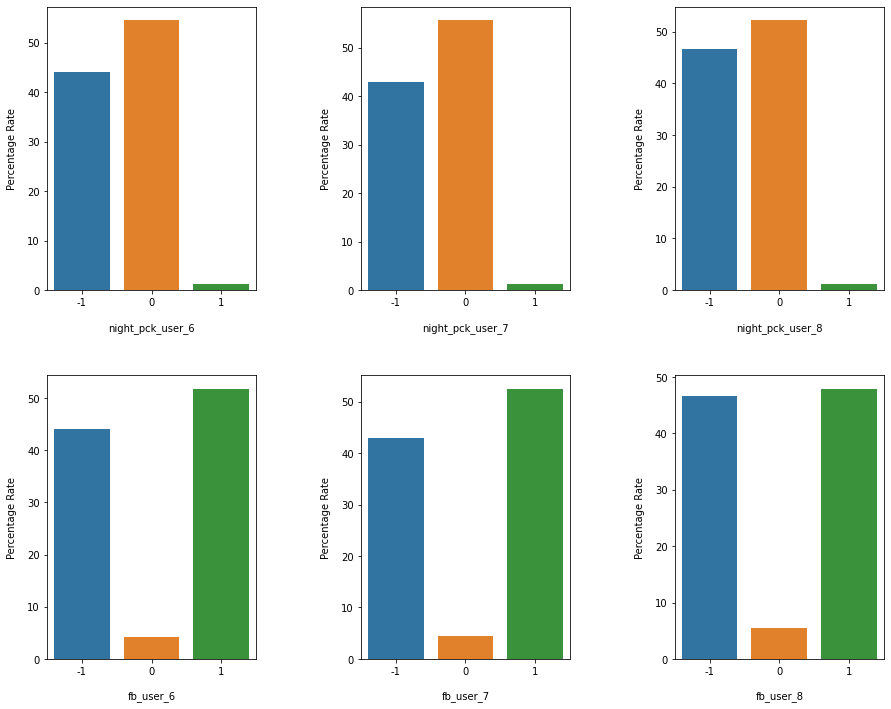

In [54]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
        
    series = round(((df2[col_list].value_counts(dropna = False))/(len(df2[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

Positive examples = 2364
Negative examples = 27460
Proportion of positive to negative examples = 8.61%


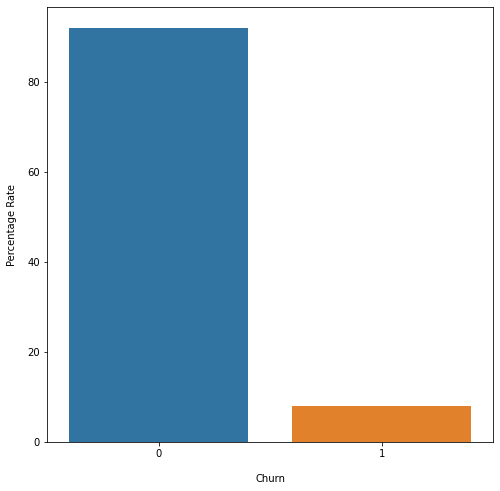

In [55]:
# Get number of positve and negative examples
pos = df2[df2["churn"] == 1].shape[0]
neg = df2[df2["churn"] == 0].shape[0]

print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")

plt.figure(figsize = (8, 8))

series = round(((df2["churn"].value_counts(dropna = False))/(len(df2["churn"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)


plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

In [56]:
def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nData Visualization of churn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = df2, showfliers = False)

   
    plt.subplot(1, 3, 2)

    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = df2, showfliers = False)
    
 
    plt.subplot(1, 3, 3)

    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = df2, showfliers = False)
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()


Data Visualization of churn vs arpu


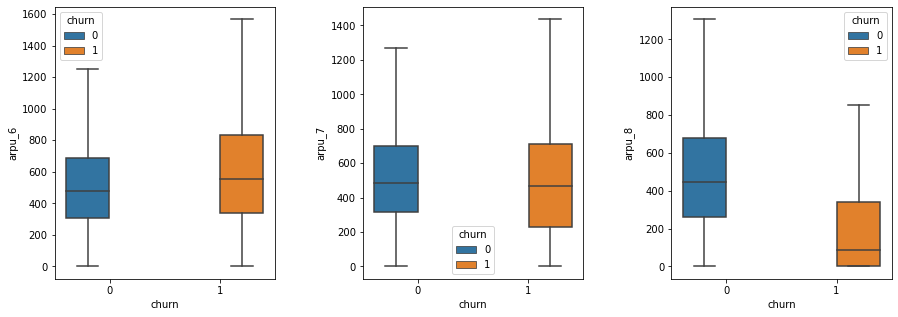


Data Visualization of churn vs onnet_mou


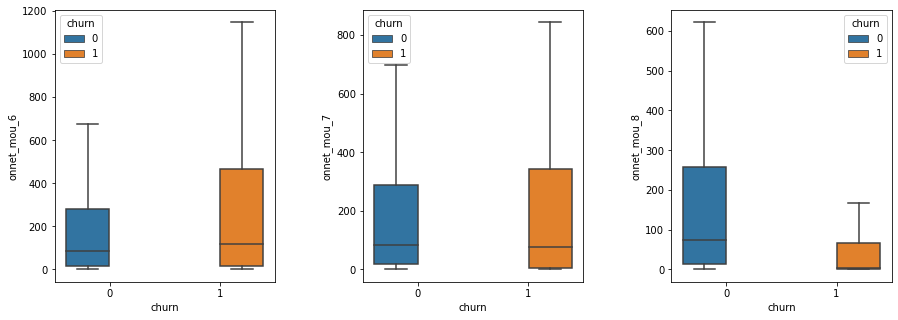


Data Visualization of churn vs offnet_mou


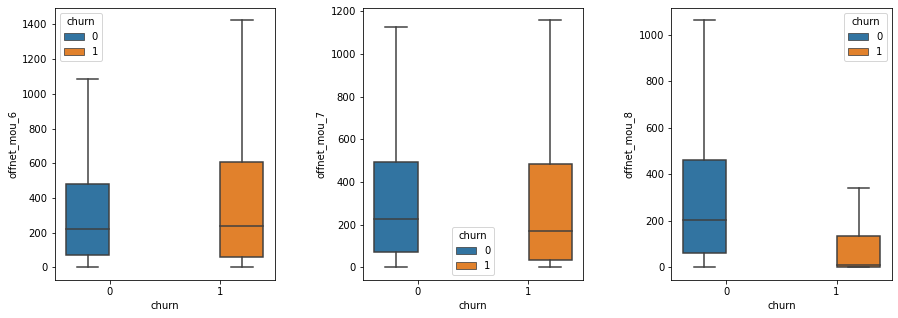


Data Visualization of churn vs total_og_mou


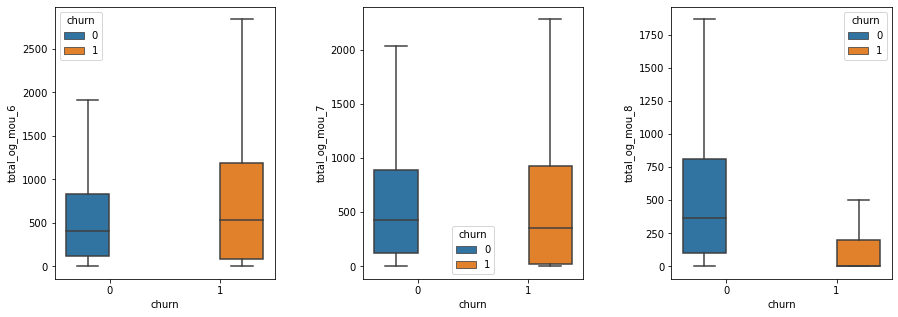


Data Visualization of churn vs total_ic_mou


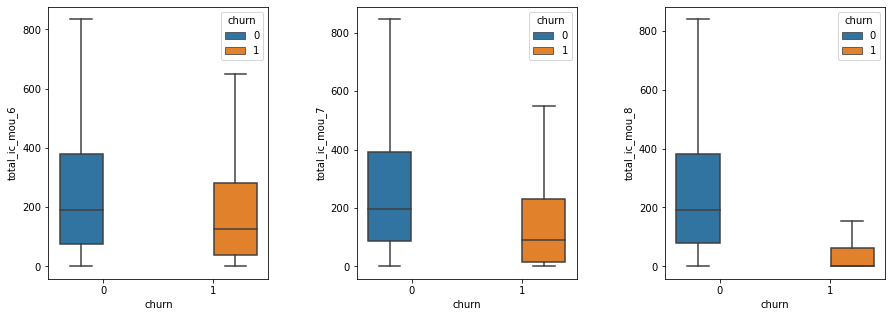


Data Visualization of churn vs total_rech_num


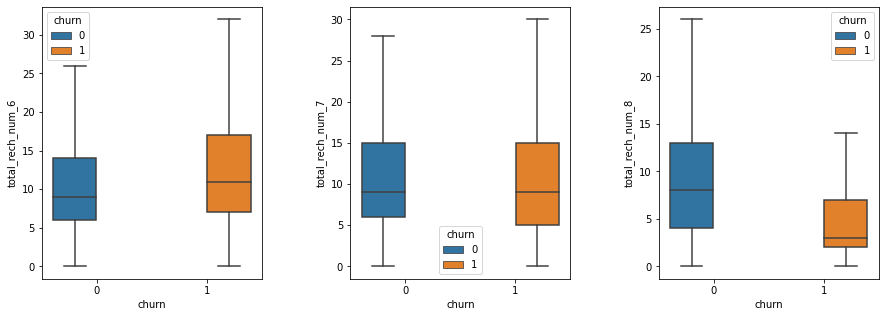


Data Visualization of churn vs total_rech_amt


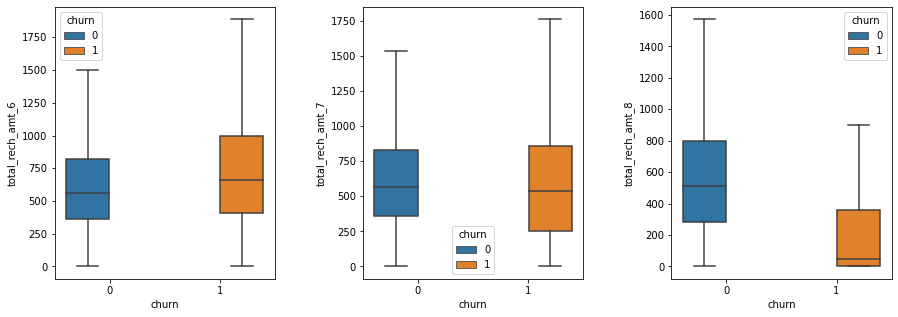


Data Visualization of churn vs total_rech_data


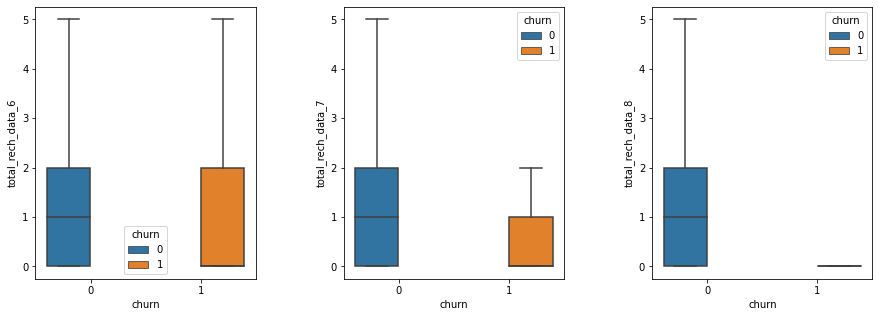


Data Visualization of churn vs vol_2g_mb


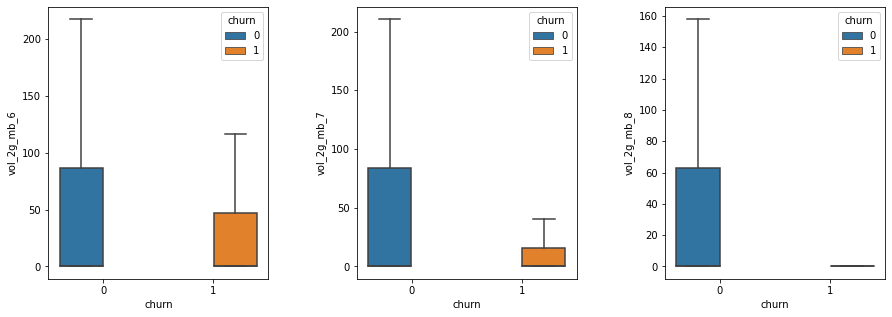


Data Visualization of churn vs vol_3g_mb


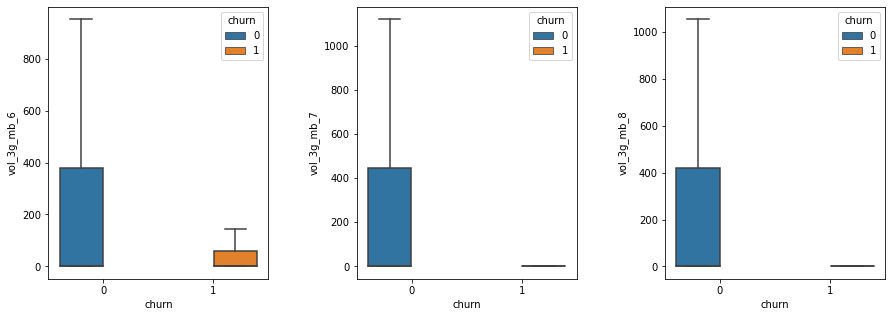


Data Visualization of churn vs total_data_rech_amt


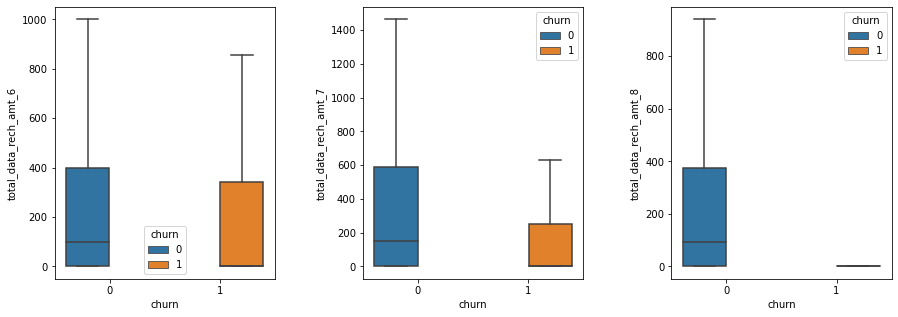

In [57]:
plot_bivariate("arpu")

plot_bivariate("onnet_mou")

plot_bivariate("offnet_mou")

plot_bivariate("total_og_mou")

plot_bivariate("total_ic_mou")

plot_bivariate("total_rech_num")

plot_bivariate("total_rech_amt")

plot_bivariate("total_rech_data")

plot_bivariate("vol_2g_mb")

plot_bivariate("vol_3g_mb")

plot_bivariate("total_data_rech_amt")

In [58]:
df2.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
arpu_6,1.000000,0.682003,0.619778,0.343885,0.218888,0.190011,0.515151,0.344861,0.293097,0.126446,0.084451,0.091188,0.193762,0.144104,0.125665,0.332272,0.250254,0.228189,0.389018,0.233674,0.187182,0.468214,0.423341,0.415527,0.122977,0.068927,0.045037,0.054344,0.024506,0.015547,0.560203,0.369345,0.309954,0.181510,0.142665,0.124397,0.124386,0.085947,0.079674,0.225125,0.169390,0.151226,0.030974,-0.034140,-0.011639,0.101627,0.063595,0.071179,0.016058,0.023974,0.012889,0.349319,0.136645,0.120199,0.955028,0.656232,0.611837,0.359418,0.270988,0.294987,-0.109153,-0.175949,-0.122931,0.072176,-0.021185,0.025441,-0.166031,-0.209324,-0.162884,0.090724,0.020739,0.035218,-0.063367,-0.099363,-0.078459,0.153220,0.071096,0.085465,-0.112004,-0.193636,-0.121716,-0.039621,-0.084621,-0.061778,-0.158811,-0.194619,-0.153057,0.177047,0.082135,0.104428,-0.002592,-0.025222,-0.017707,-0.123974,-0.204332,-0.138944,0.041807,0.059760,0.055983,0.112693,0.089954,-0.023367,0.003365,0.067199
arpu_7,0.682003,1.000000,0.767143,0.212713,0.321003,0.270779,0.355968,0.492669,0.397986,0.092642,0.093467,0.093837,0.134787,0.180120,0.152270,0.215675,0.305336,0.256323,0.250161,0.382571,0.306308,0.420003,0.511164,0.454754,0.068380,0.115440,0.070322,0.018084,0.026200,0.017888,0.368902,0.538390,0.431726,0.109477,0.165308,0.143613,0.087636,0.123759,0.116897,0.140187,0.211376,0.184371,0.007778,-0.015937,-0.007898,0.059973,0.100083,0.082853,0.008028,0.023994,0.016718,0.166367,0.303032,0.219739,0.683232,0.953983,0.757663,0.267926,0.392793,0.375124,-0.165607,-0.096183,-0.092986,-0.018854,0.070518,0.047508,-0.197788,-0.159430,-0.142212,0.021983,0.106865,0.064391,-0.093990,-0.056477,-0.050974,0.070594,0.158753,0.117672,-0.177090,-0.114584,-0.083789,-0.081746,-0.034799,-0.049855,-0.183181,-0.153112,-0.134286,0.085448,0.190979,0.132415,-0.027078,0.010371,0.000438,-0.188923,-0.123931,-0.100912,0.030530,0.083410,0.101979,0.055333,-0.012701,0.091467,0.031556,-0.009176
arpu_8,0.619778,0.767143,1.000000,0.150736,0.232295,0.345283,0.279095,0.376009,0.523837,0.088353,0.077881,0.110957,0.130101,0.141780,0.199539,0.208371,0.264363,0.347087,0.148893,0.257377,0.398798,0.397011,0.440010,0.457025,0.100929,0.124794,0.107687,0.013613,0.015812,0.012377,0.274829,0.400670,0.560766,0.116134,0.158176,0.208142,0.073925,0.099254,0.139846,0.143012,0.193330,0.253321,0.009197,-0.016210,0.021543,0.070237,0.087563,0.106602,0.010694,0.033139,0.027322,0.116823,0.195951,0.357558,0.616423,0.758262,0.963979,0.267685,0.336880,0.457155,-0.131564,-0.102537,0.000011,0.017274,0.041733,0.150630,-0.162706,-0.145386,-0.074253,0.029383,0.061758,0

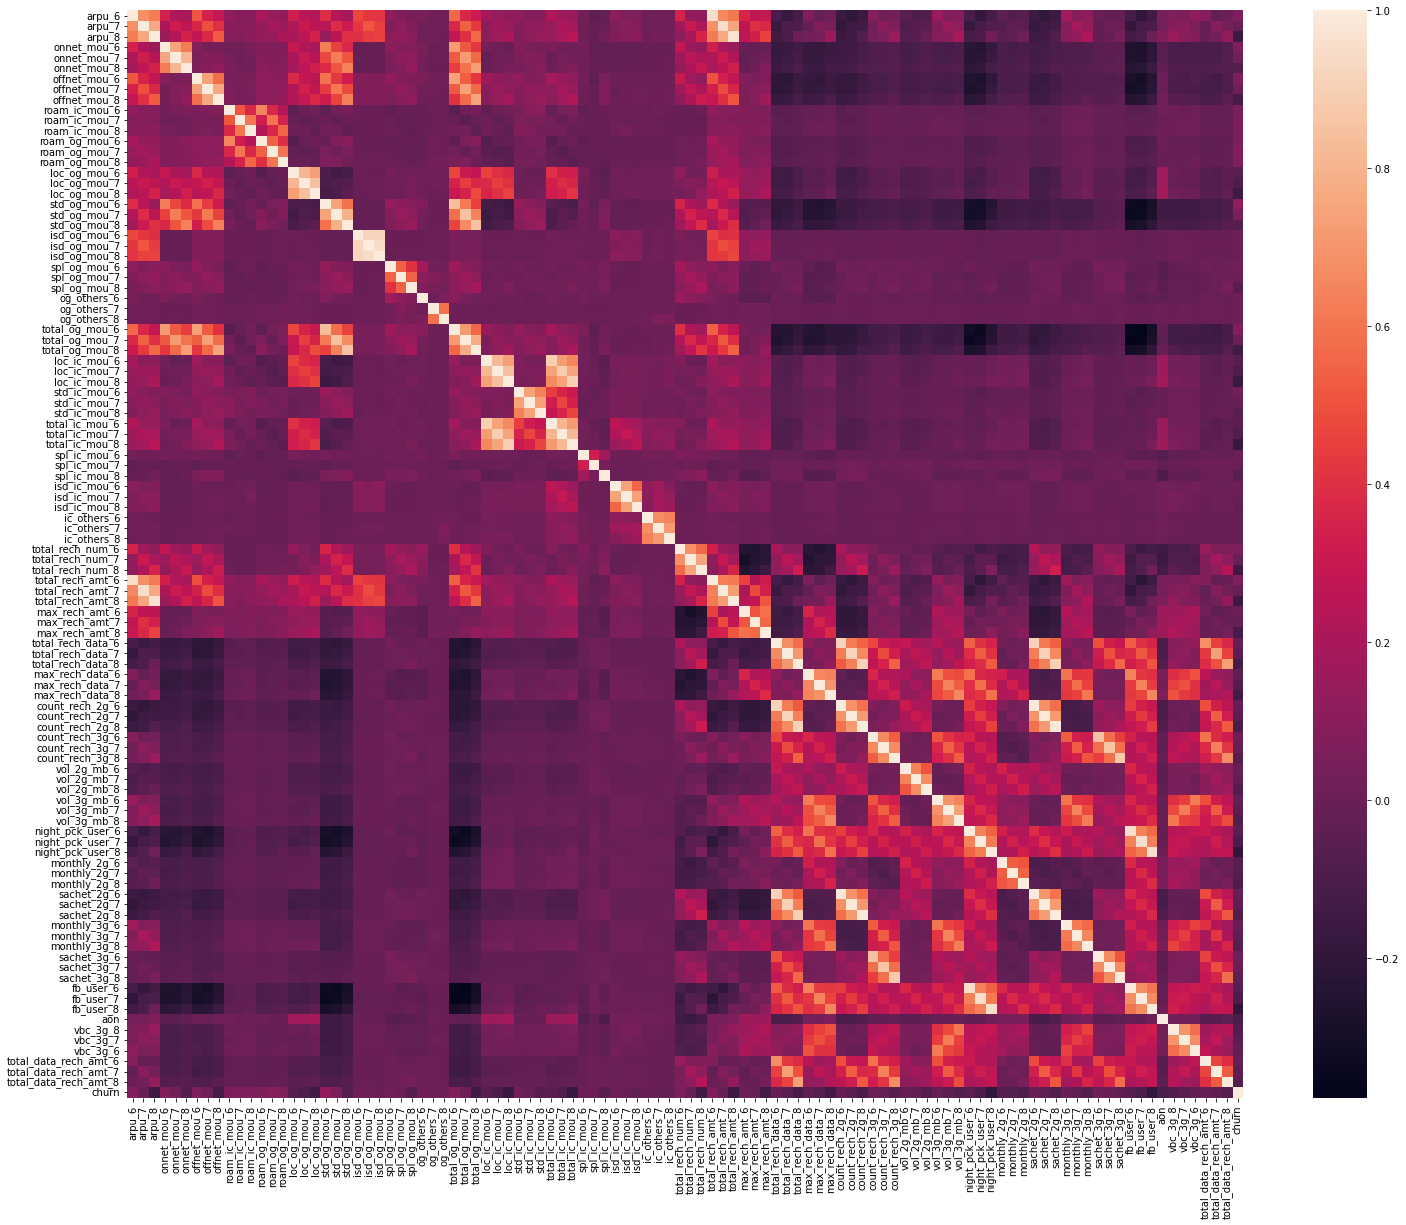

In [59]:
plt.figure(figsize = (25, 20))

sns.heatmap(df2.corr())

plt.show()

## Feature Engineering

In [60]:
def derive_good_action_phase(dff,col):
    col_6 = col+'_6'
    col_7 = col+'_7'
    col_8 = col+'_8'
    good_phase_col = col+'_good_phase'
    action_phase_col = col+'_action_phase'
    
    dff[good_phase_col] = (dff[col_6] + dff[col_7])/2
    dff[action_phase_col] = dff[col_8] - dff[good_phase_col]
    
    dff.drop([col_6, col_7, col_8], axis=1, inplace=True)
    
    return dff

In [61]:
df2 = derive_good_action_phase(df2, "arpu")

df2 = derive_good_action_phase(df2, "onnet_mou")

df2 = derive_good_action_phase(df2, "offnet_mou")

df2 = derive_good_action_phase(df2, "roam_ic_mou")

df2 = derive_good_action_phase(df2, "roam_og_mou")

df2 = derive_good_action_phase(df2, "loc_og_mou")

df2 = derive_good_action_phase(df2, "std_og_mou")

df2 = derive_good_action_phase(df2, "isd_og_mou")

df2 = derive_good_action_phase(df2, "spl_og_mou")

df2 = derive_good_action_phase(df2, "og_others")

df2 = derive_good_action_phase(df2, "total_og_mou")

df2 = derive_good_action_phase(df2, "loc_ic_mou")

df2 = derive_good_action_phase(df2, "std_ic_mou")

df2 = derive_good_action_phase(df2, "spl_ic_mou")

df2 = derive_good_action_phase(df2, "isd_ic_mou")

df2 = derive_good_action_phase(df2, "ic_others")

df2 = derive_good_action_phase(df2, "total_ic_mou")

df2 = derive_good_action_phase(df2, "total_rech_num")

df2 = derive_good_action_phase(df2, "total_rech_amt")

df2 = derive_good_action_phase(df2, "max_rech_amt")

df2 = derive_good_action_phase(df2, "total_rech_data")

df2 = derive_good_action_phase(df2, "max_rech_data")

df2 = derive_good_action_phase(df2, "count_rech_2g")

df2 = derive_good_action_phase(df2, "count_rech_3g")

df2 = derive_good_action_phase(df2, "vol_2g_mb")

df2 = derive_good_action_phase(df2, "vol_3g_mb")

df2 = derive_good_action_phase(df2, "monthly_2g")

df2 = derive_good_action_phase(df2, "sachet_2g")

df2 = derive_good_action_phase(df2, "monthly_3g")

df2 = derive_good_action_phase(df2, "sachet_3g")

df2 = derive_good_action_phase(df2, "vbc_3g")

df2 = derive_good_action_phase(df2, "total_data_rech_amt")

df2.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,0,0,0,1,1,1,968,1,206.1005,7.7025,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,3.5,-1.5,307.0,-55.0,252.0,0.0,1.0,0.0,252.0,0.0,0.0,0.0,1.0,0.0,15.725,-9.975,117.165,-7.555,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.600,-20.200,252.0,0.0
1,-1,-1,-1,-1,-1,-1,802,1,1209.5150,1961.9650,56.26,-3.97,510.295,-184.385,24.86,6.78,18.165,19.895,478.035,-222.245,68.000,9.840,0.090,9.920,2.25,4.25,0.0,0.0,548.385,-198.225,391.555,-203.515,176.810,17.130,0.105,-0.105,8.295,23.295,15.465,-0.325,592.250,-163.510,5.0,2.0,1185.0,2453.0,1185.0,395.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.060,38.680,0.0,0.0
2,-1,0,0,-1,1,1,315,0,435.4720,-298.1100,382.36,-347.28,87.645,48.835,0.00,0.00,0.000,0.000,333.135,-270.095,136.870,-38.590,0.000,0.000,0.00,10.23,0.0,0.0,470.010,-298.450,52.630,-36.840,13.545,-12.795,0.000,0.000,0.000,0.000,0.000,0.000,66.175,-49.635,20.0,-6.0,519.0,-399.0,122.0,-92.0,1.0,2.0,77.0,-54.0,1.0,2.0,0.0,0.0,178.000,-177.970,375.475,-363.535,0.5,-0.5,0.5,2.5,0.0,0.0,0.0,0.0,516.405,-495.375,177.0,30.0
3,-1,-1,-1,-1,-1,-1,720,0,556.1030,81.6570,117.26,-32.12,827.305,156.085,0.00,0.00,0.000,0.000,95.565,34.175,848.990,89.800,0.000,0.000,0.00,0.00,0.0,0.0,944.565,123.975,106.505,52.605,62.985,38.945,0.000,0.000,0.000,0.000,0.000,0.000,169.490,91.550,24.0,3.0,640.0,78.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0
4,-1,0,0,-1,1,1,604,0,134.1235,232.8425,49.81,-16.23,87.385,118.505,0.00,0.00,0.000,0.000,132.795,49.345,4.355,35.255,0.005,-0.005,0.05,17.66,0.0,0.0,137.210,102.270,145.520,78.690,8.915,48.375,0.000,0.000,14.115,-10.375,2.675,10.385,171.235,127.095,4.0,0.0,227.0,212.0,89.5,89.5,1.0,1.0,89.5,89.5,0.0,0.0,1.0,1.0,0.240,-0.230,299.545,710.375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25.930,14.520,356.0,184.0


In [62]:
df2.shape

(29824, 72)

## Model Building

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#### Train and test split

In [64]:
x= df2.drop('churn',axis=1)
y= df2[['churn']]

x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20876, 71)
(8948, 71)
(20876, 1)
(8948, 1)


## outlier treatment

In [65]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaled_data = scaler.fit_transform(x_train)

x_train = pd.DataFrame(data = scaled_data, index = x_train.index, columns = x_train.columns)
x_test = pd.DataFrame(data = scaler.transform(x_test), index = x_test.index, columns = x_test.columns)

print(x_train.head())
print(x_test.head())

       night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
2234               -1.0              -1.0              -1.0       -1.0   
13773               0.0               0.0               1.0        0.0   
21641              -1.0              -1.0              -1.0       -1.0   
15592               0.0               0.0               0.0       -0.5   
12480               0.0               0.0               0.0        0.0   

       fb_user_7  fb_user_8       aon  arpu_good_phase  arpu_action_phase  \
2234        -1.0       -0.5 -0.408085         0.172815          -0.387604   
13773        0.0        0.5 -0.196796        -1.175106           0.326826   
21641       -1.0       -0.5  0.246377         2.076424          -0.778751   
15592       -0.5        0.0  0.376049        -0.404950           1.155496   
12480        0.0        0.5  0.611747         0.120158          -0.051427   

       onnet_mou_good_phase  onnet_mou_action_phase  offnet_mou_good_phase  \
2234          

       night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
18395              -1.0               0.0              -1.0       -1.0   
16876               0.0               0.0              -1.0        0.0   
11117              -1.0               0.0               0.0       -1.0   
13350               0.0               0.0               0.0        0.0   
13749               0.0               0.0              -1.0        0.0   

       fb_user_7  fb_user_8       aon  arpu_good_phase  arpu_action_phase  \
18395        0.0       -0.5  0.231121        -0.076706          -0.490632   
16876        0.0       -0.5 -0.394355         0.287699          -0.384495   
11117        0.0        0.5  0.376812        -1.039758           0.573235   
13350        0.0        0.5  0.648360         0.387465          -0.335028   
13749        0.0       -0.5  0.756674         0.527496          -0.733274   

       onnet_mou_good_phase  onnet_mou_action_phase  offnet_mou_good_phase  \
18395         

In [66]:
num_col = x_train.select_dtypes(include = ['int64','float64']).columns.tolist()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train[num_col] = scaler.fit_transform(x_train[num_col])

## Handling Imbalanced Dataset


#### Using SMOTE method

In [67]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [68]:
print(x_train_sm.shape)
print(y_train_sm.shape)

(38392, 71)
(38392, 1)


## Logistic Regression and PCA

In [69]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [70]:
pca.fit(x_train)
churn_pca = pca.fit_transform(x_train)

In [71]:
pca = pca.named_steps['pca']
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      11.99
1      20.22
2      26.19
3      31.45
4      36.14
5      40.12
6      43.60
7      46.66
8      49.43
9      52.03
10     54.58
11     57.00
12     59.31
13     61.53
14     63.66
15     65.74
16     67.59
17     69.39
18     71.14
19     72.82
20     74.42
21     76.02
22     77.54
23     78.93
24     80.26
25     81.54
26     82.78
27     83.95
28     85.03
29     86.07
30     87.10
31     88.03
32     88.93
33     89.80
34     90.64
35     91.41
36     92.17
37     92.88
38     93.57
39     94.24
40     94.87
41     95.48
42     96.02
43     96.52
44     96.98
45     97.42
46     97.84
47     98.25
48     98.60
49     98.90
50     99.15
51     99.37
52     99.55
53     99.69
54     99.84
55     99.93
56     99.96
57     99.99
58    100.00
59    100.00
60    100.00
61    100.00
62    100.00
63    100.00
64    100.00
65    100.00
66    100.00
67    100.00
68    100.00
69    100.00
70    100.00
dtype: float64


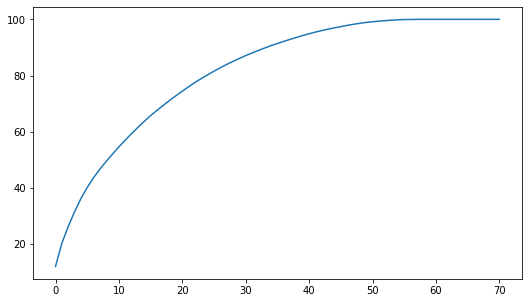

In [72]:
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) 
plt.plot(cumulative_variance)

In [73]:
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [74]:
pipeline.fit(x_train, y_train)

pipeline.score(x_train, y_train)

0.8074343744012263

In [75]:
# predict churn on test data
y_pred = pipeline.predict(x_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(x_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[2501 5763]
 [  79  605]]
Sensitivity: 	0.88
Specificity: 	0.3
AUC:    	 0.6


## Hyperparameter tuning - PCA and Logistic Regression

In [76]:
y_train.value_counts()/y_train.shape

churn
0           0.919525
1        1680.000000
dtype: float64

In [77]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [78]:
# fit model
model.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [79]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.017217,0.031721,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.441707,0.209997,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,1.135602,0.063978,0.059365,0.011691,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.884638,0.887847,0.895463,0.872280,0.883260,0.884698,0.007511,8
3,0.178055,0.021447,0.000000,0.000000,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,0.399501,0.049468,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,0.175154,0.011647,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
6,1.444149,0.284105,0.085081,0.027878,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.885479,0.887915,0.896969,0.872701,0.884611,0.885535,0.007772,7
7,0.197035,0.049030,0.000000,0.000000,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.391049,0.043064,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.167668,0.036743,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [80]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8857712577350718
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [81]:
# predict churn on test data
y_pred = model.predict(x_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(x_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[2530 5734]
 [  76  608]]
Sensitivity: 	0.89
Specificity: 	0.31
AUC:    	 0.61


## Random Forest

In [82]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [83]:
model.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [84]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9069272582090736
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [85]:
# predict churn on test data
y_pred = model.predict(x_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(x_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8264    0]
 [ 684    0]]
Sensitivity: 	0.0
Specificity: 	1.0
AUC:    	 0.75


In [86]:
 ##Poor sensitivity. The best model is PCA along with Logistic regression.

## Choosing best features

In [87]:
max_features = int(round(np.sqrt(x_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

8


In [88]:
# fit model
rf_model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   25.7s


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=8,
                       oob_score=True, random_state=4, verbose=1)

In [89]:
# OOB score
rf_model.oob_score_

0.9325062272465989

In [90]:
len(x_train.columns)

71

In [91]:
# predict churn on test data
y_pred = rf_model.predict(x_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(x_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


[[8264    0]
 [ 684    0]]
Sensitivity: 	0.0
Specificity: 	1.0
ROC:    	 0.25


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


## Feature Importance

In [92]:
# predictors
features = df2.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 99.99999999999999


,variables,importance_percentage
0,arpu_action_phase,8.192805
1,total_rech_amt_action_phase,5.975299
2,total_ic_mou_action_phase,5.314215
3,max_rech_amt_action_phase,4.014524
4,loc_ic_mou_action_phase,3.555662
5,total_rech_num_action_phase,3.394469
6,total_og_mou_action_phase,3.094052
7,std_ic_mou_action_phase,3.092410
8,roam_og_mou_action_phase,2.869638
9,loc_og_mou_action_phase,2.779523


In [93]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<AxesSubplot:>

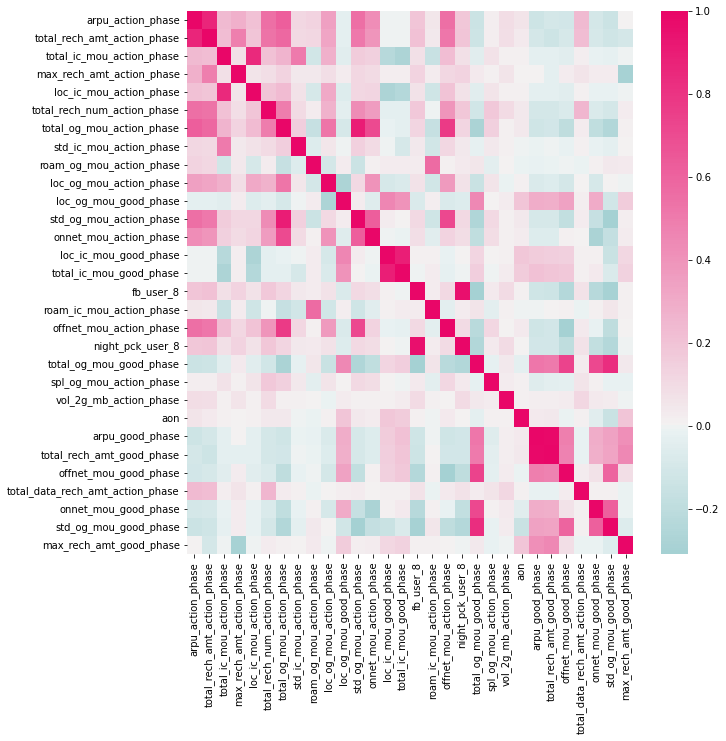

In [94]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=x_train[top_features].corr(), center=0.0, cmap=mycmap)

In [95]:
top_features = ['arpu_action_phase','total_rech_amt_action_phase','total_ic_mou_action_phase',
                'max_rech_amt_action_phase','loc_ic_mou_action_phase','total_rech_num_action_phase',
                'total_og_mou_action_phase','std_ic_mou_action_phase','roam_og_mou_action_phase',
                'loc_og_mou_action_phase','loc_og_mou_good_phase']
x_train = x_train[top_features]
x_test = x_test[top_features]

In [96]:
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [97]:
# fit model
model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [98]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8466605571196254
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [99]:
# predict churn on test data
y_pred_load = model.predict(x_test)

# create onfusion matrix
cm_load = confusion_matrix(y_test, y_pred_load)
print(cm_load)

# check sensitivity and specificity
sensitivity_load, specificity_load, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity_load, 2), "\n", "Specificity: \t", round(specificity_load, 2), sep='')

# check area under curve
y_pred_prob_load = model.predict_proba(x_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob_load),2))

[[2659 5605]
 [  74  610]]
Sensitivity: 	0.0
Specificity: 	1.0
ROC:    	 0.66


In [100]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [101]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [102]:
# coefficients
coefficients = logistic_model.coef_.reshape((11, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(x_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [103]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,arpu_action_phase,total_rech_amt_action_phase,total_ic_mou_action_phase,max_rech_amt_action_phase,loc_ic_mou_action_phase,total_rech_num_action_phase,total_og_mou_action_phase,std_ic_mou_action_phase,roam_og_mou_action_phase,loc_og_mou_action_phase,loc_og_mou_good_phase
0,-1.192256,-0.19628,-0.217484,-0.155202,-0.212302,-0.198462,-0.316403,-0.214326,-0.091355,0.038865,-0.887339,-1.494744


## Business Insights
#### Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
#### The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
#### To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.